<a href="https://colab.research.google.com/github/TomasMendozaHN/ICDF_Class/blob/main/05252022_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount my Google Drive!

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Run the YOLO v3 Notebook we created earlier!

Saving kaggle.json to kaggle.json
Output file downloaded to /kaggle/input/dog-cycle-car.png
Output file downloaded to /kaggle/input/office.jpg
Output file downloaded to /kaggle/output/det_dog-cycle-car.png
Output file downloaded to /kaggle/output/det_office.jpg
Output file downloaded to /kaggle/yolov3.cfg
Kernel log downloaded to /kaggle/yolo-v3-pytorch-tutorial-from-scratch.log 
Mounted at /content/drive/

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Yolov3.rar

Creating    /kaggle/input/Yolov3                                      OK
Extracting  /kaggle/input/Yolov3/coco.names                                0%  OK 
Extracting  /kaggle/input/Yolov3/futur.ttf                                 0%  OK 
Extracting  /kaggle/input/Yolov3/yolov3.weights                            1%  3%  5%  7%  9% 10% 12% 14% 16% 18% 19% 21% 23% 25% 27% 29% 30%

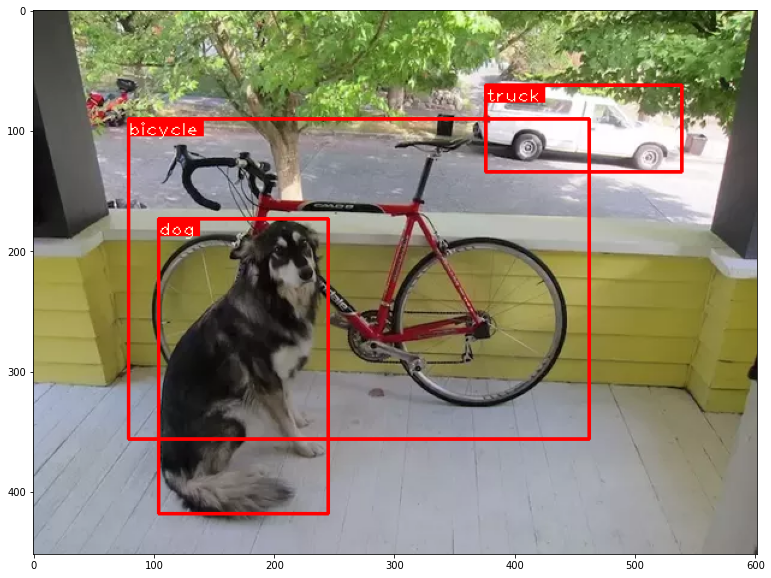

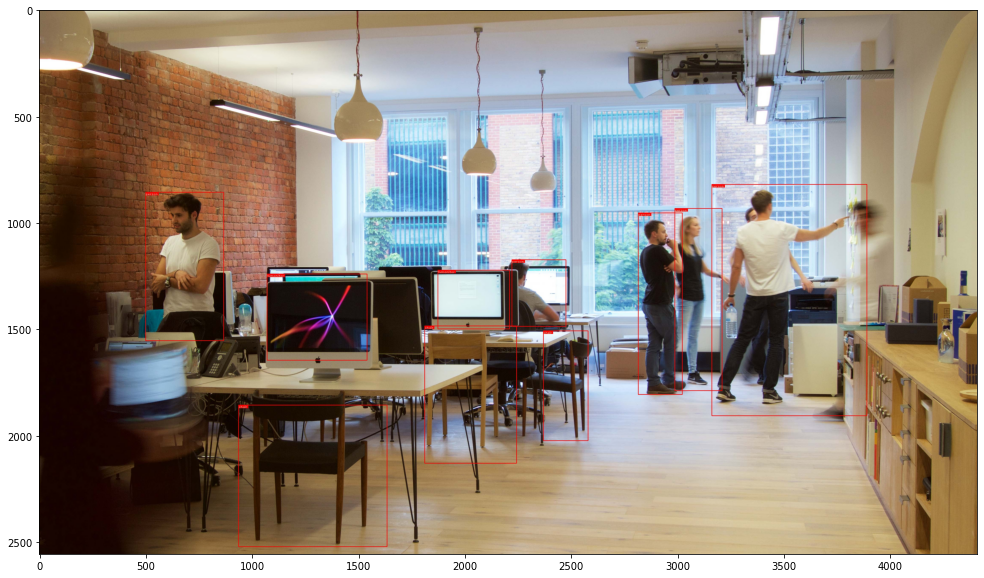

In [2]:
%run /content/gdrive/MyDrive/Colab\ Notebooks/05252022_YOLO_V3.ipynb

# Run the Webcam Notebook to handle our webcam!

In [5]:
%run /content/drive/MyDrive/Colab\ Notebooks/05252022_WebCam.ipynb

# Draw figures on frame

<IPython.core.display.Javascript object>

bbox bytes =  
bbox bytes =  
bbox bytes =  

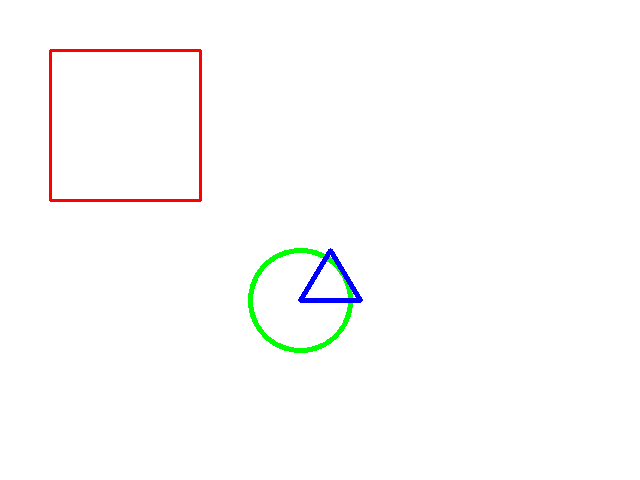
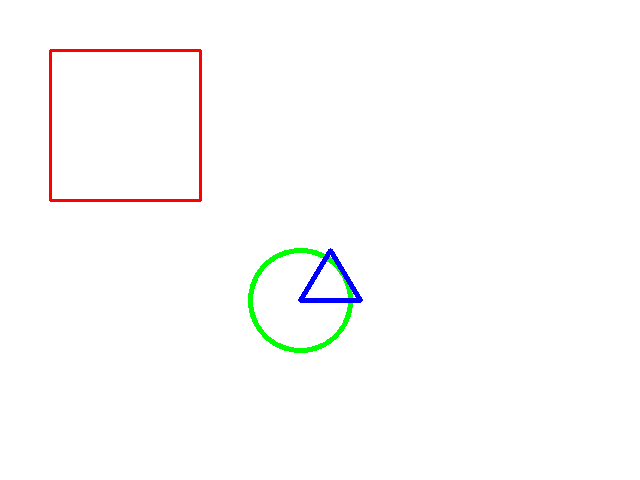
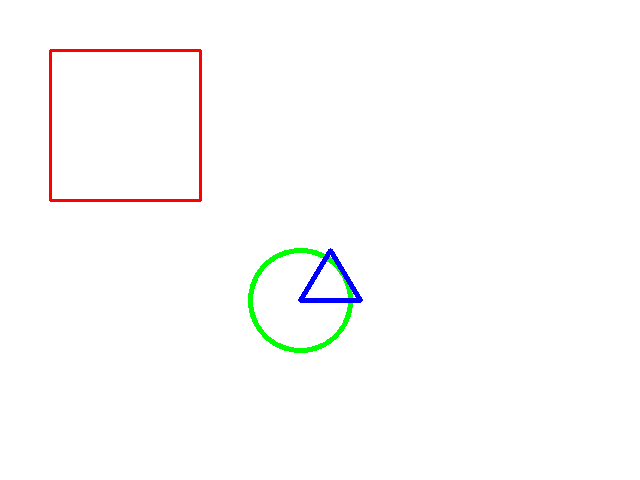

KeyboardInterrupt: ignored

In [54]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # Draw Figures
    # cv2 rectangle (img, (xmin, ymin), (xmax, ymax), color, border_thickness)
    bbox_array = cv2.rectangle(bbox_array,(50,50),(200,200),(255,0,0),2)

    # cv2 circle (img, ((x_center, y_center)), radius, color, border_thickness)
    bbox_array = cv2.circle(bbox_array,((300,300)), 50, (0,255,0), 4)

    # cv2 triangle!
    cv2.line(bbox_array, (300,300), (330,250), (0, 0, 255), 3)
    cv2.line(bbox_array, (330,250), (360,300), (0, 0, 255), 3)
    cv2.line(bbox_array, (360,300), (300,300), (0, 0, 255), 3)

    # Convert back to image!
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)

    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

# Canny Edge Detector


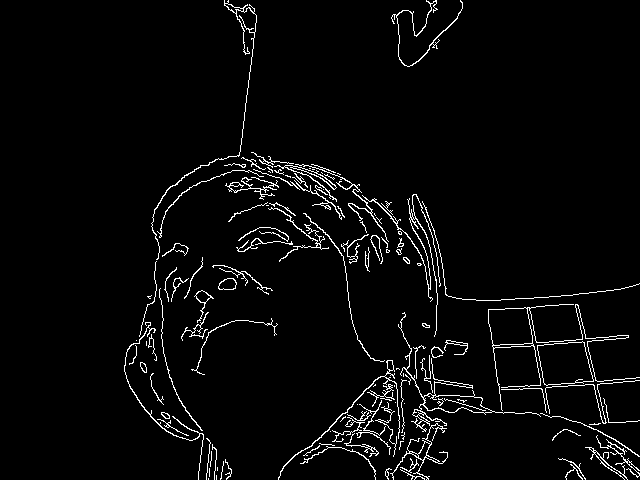

KeyboardInterrupt: ignored

In [60]:
from IPython.display import clear_output 
from google.colab.patches import cv2_imshow


# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # Apply Canny Edge Detector
    canny = cv2.Canny(img, 10, 200)

    clear_output(wait=True)
    cv2_imshow(canny)

# Perform simple face detection on the stream :)

In [7]:
# Load Face Detection network
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [8]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

# Perform FasterRCNN on Steam

In [14]:
import torchvision
import torch

# First, load pre-trained faster RCNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
                                                pretrained=True, 
                                                box_nms_thresh=0.5
                                                )

# Then send to CUDA and set to evaluation mode!
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.eval()
print("FasterRCNN Model Ready!")

FasterRCNN Model Ready!


In [37]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    img = img.astype(float) / 255

    # Convert image to tensor
    img = img.transpose((2,0,1))
    img = img[None,...]
    img = torch.as_tensor(img, dtype=torch.float32).to(device)

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # get face region coordinates
    outputs = model(img)

    boxes = outputs[0]['boxes']
    labels = outputs[0]['labels']

    boxes, labels = boxes.detach().cpu().numpy(), labels.detach().cpu().numpy()

    # Filter out boxes for Class = 1 (person)
    boxes = [x for x,y in zip(boxes,labels) if y==1]

    for (x,y,w,h) in boxes:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(w+x,h+y),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored